# <B>MOEIN HASSANPOUR - 40032313</B>
 *IMAGE PROCESSING EXERCISE 1*

---

> a) Computing the color matrix and index matrix of 2 sample images:



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_color_map(image_path):

    image = cv2.imread(image_path)

    if image is None:
      raise ValueError("تصویر یافت نشد!")


    # تبدیل BGR به RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, c = image.shape #تعداد رنگ و عرض و ارتفاع

    # تبدیل تصویر به لیست پیکسل‌ها
    pixels = image.reshape(-1, 3)

    # استخراج رنگ‌های یکتا و ایندکس‌های آن‌ها
    unique_colors, indices = np.unique(pixels, axis=0, return_inverse=True)

    index_matrix = indices.reshape(h, w) #بازگردانی به فرم اصلی

    if index_matrix is not None:
      print('\t||',image_path," details \n\n","--> Index Matrix Shape:", index_matrix.shape)
      print("--> Color Map Shape:", unique_colors.shape)
      print("\nIndex Matrix (5x5 region):")
      print(index_matrix[:5, :5])
      print("\nColor Map (first 5 colors):")
      print(unique_colors[:5])

    return index_matrix, unique_colors, h, w

Index Matrix Shape --> ابعاد تصویر

Color Map Shape --> ابعاد ماتریس شاخص رنگ

* sample 1:


In [2]:
index_matrix, unique_colors, h, w = extract_color_map("space.jpg")

	|| space.jpg  details 

 --> Index Matrix Shape: (637, 850)
--> Color Map Shape: (108521, 3)

Index Matrix (5x5 region):
[[19803 19803 20328 20822 20822]
 [19803 19803 20328 20328 20822]
 [19797 19797 19797 20321 21358]
 [18750 19283 19797 20816 21358]
 [19796 20815 22388 23438 22916]]

Color Map (first 5 colors):
[[0 0 0]
 [0 0 2]
 [0 0 4]
 [0 0 5]
 [0 0 7]]


* sample 2:


In [ ]:
index_matrix2, unique_colors2, h2, w2 = extract_color_map("Brisbane2.jpg")

	|| Brisbane2.jpg  details 

 --> Index Matrix Shape: (464, 375)
--> Color Map Shape: (53293, 3)

Index Matrix (5x5 region):
[[2649 2649 2649 2649 2638]
 [2649 2649 2649 2649 2638]
 [2649 2649 2649 2649 2638]
 [2649 2649 2649 2649 2638]
 [2649 2649 2649 2649 2638]]

Color Map (first 5 colors):
[[0 0 2]
 [0 0 3]
 [0 0 4]
 [0 0 5]
 [0 0 6]]




---




---


>  b) Computing by clustering on larger images:










In [6]:
def create_indexed_color_matrix(image_path, n_colors):

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("تصویر یافت نشد!")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, c = image.shape

    pixels = image.reshape(-1, 3).astype(np.float32)

    # K-Means algorithm
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) # معیار توقف
    _, labels, centroids = cv2.kmeans(pixels, n_colors, None, criteria, 5, cv2.KMEANS_RANDOM_CENTERS)

    index_matrix = labels.reshape(h, w) # شاخص رنگ

    #تبدیل مراکز خوشه‌ها به مقدار صحیح برای رنگ‌ها
    color_map = centroids.astype(np.uint8)

    if index_matrix is not None:
      print('\t||',image_path," details \n\n")
      print("--> Index Matrix Shape:", index_matrix.shape)
      print("--> Color Map Shape:", color_map.shape)

      print("\nIndex Matrix (5x5 region):")
      print(index_matrix[:5, :5])

      print("\nColor Map (first 5 colors):")
      print(color_map[:5])

    return index_matrix, color_map


In [4]:
def compare_images(original_image_path, index_matrix, color_map):

    # بازسازی تصویر فشرده شده
    reconstructed_image = color_map[index_matrix]

    plt.figure(figsize=(10,5))

    # نمایش تصویر اصلی
    original_image = cv2.cvtColor(cv2.imread(original_image_path), cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    # نمایش تصویر بازسازی‌شده
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image)
    plt.title("Reconstructed Image")
    plt.axis("off")

    plt.show()


* sample 3 :

	|| royal-albert-hall.jpg  details 

 --> Index Matrix Shape: (500, 900)
--> Index Matrix Shape: (500, 900)
--> Color Map Shape: (128, 3)

Index Matrix (5x5 region):
[[107 107 107 107  94]
 [107 107 107 107 107]
 [107 107 107 107 107]
 [107 107 107 107 107]
 [107 107 107 107 107]]

Color Map (first 5 colors):
[[242 126  64]
 [206  90  94]
 [186  77  64]
 [203  47  52]
 [180  77  88]]


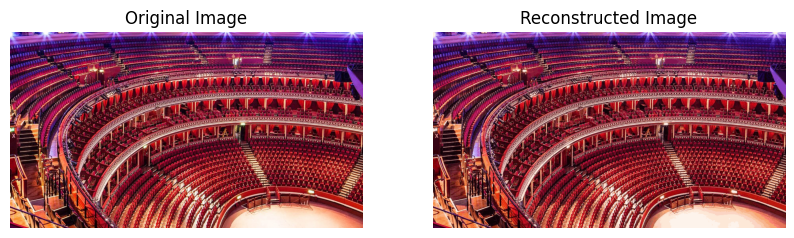

In [ ]:
image3 = "royal-albert-hall.jpg"
index_matrix3, color_map3 = create_indexed_color_matrix(image3, 128 )

compare_images(image3, index_matrix3, color_map3)

* sample 4 :

	|| space.jpg  details 


--> Index Matrix Shape: (637, 850)
--> Color Map Shape: (128, 3)

Index Matrix (5x5 region):
[[91 91 91 49 49]
 [91 91 91 91 49]
 [91 91 91 91 85]
 [91 91 91 85 85]
 [91 85 85 48 48]]

Color Map (first 5 colors):
[[ 51  45  34]
 [  3  65 128]
 [  2  51 106]
 [  2  97 174]
 [ 17  98 160]]


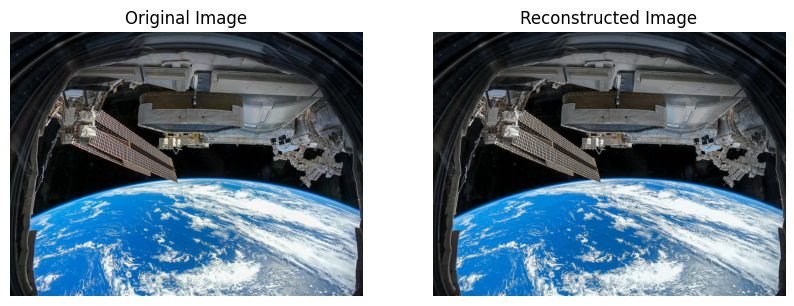

In [7]:
image4 = "space.jpg"
index_matrix4, color_map4 = create_indexed_color_matrix(image4, 128 )

compare_images(image4, index_matrix4, color_map4)

\

---


# **تمرین 1** *بر پایه موضوع تصوير رنگی با شاخص طرح شده است*

*    در بخش اول محاسبه ماتریس شاخص رنگ برای دو نمونه تصویر انجام شده است.


*    در بخش دوم سوال(امتیازی) ماتریس شاخص بوسیله تکنیک خوشه بندی انجام شده است. بوسیله این روش رنگ هایی که به هم نزدیک تر هستند در یک خوشه قرار میگیرند و در بازیابی تصویر، به پیکسل هایی که رنگ های آن ها در یک خوشه مشترک هستند، رنگ های  یکسان تعلق میگیرد.

*    تکنیک خوشه بندی باعث کاهش زیاد حجم ماتریس شاخص رنگ میشود و کاهش حجم تصویر میشود. اما از معایب آن میتوان به غیر طبیعی جلوه پیدا کردن تصویر مربوطه در تعداد خوشه های پایین اشاره کرد.









